# 单例

## 目标

* 单例设计模式
* `__new__` 方法
* Python 中的单例

## 01. 单例设计模式

* 设计模式
    * **设计模式** 是 **前人工作的总结和提炼**，通常，被人们广泛流传的设计模式都是针对 **某一特定问题** 的成熟的解决方案
    * 使用 **设计模式** 是为了可重用代码、让代码更容易被他人理解、保证代码可靠性

* 单例设计模式
    * **目的** —— 让 **类** 创建的对象，在系统中 **只有** **唯一的一个实例**
    * 每一次执行 `类名()` 返回的对象，**内存地址是相同的**

### 单例设计模式的应用场景

* **音乐播放** 对象
* **回收站** 对象
* **打印机** 对象
* ……

## 02. `__new__` 方法

* 使用 **类名()** 创建对象时，`Python` 的解释器 **首先** 会 调用 `__new__` 方法为对象 **分配空间**
* `__new__` 是一个 由 `object` 基类提供的 **内置的静态方法**，主要作用有两个：
    * 1) 在内存中为对象 **分配空间**
    * 2) **返回** 对象的引用
* `Python` 的解释器获得对象的 **引用** 后，将引用作为 **第一个参数**，传递给 `__init__` 方法

> 重写 `__new__` 方法 的代码非常固定！

* 重写 `__new__` 方法 **一定要** `return super().__new__(cls)` 
* 否则 Python 的解释器 **得不到** 分配了空间的 **对象引用**，**就不会调用对象的初始化方法**
* 注意：`__new__` 是一个静态方法，在调用时需要 **主动传递** `cls` 参数

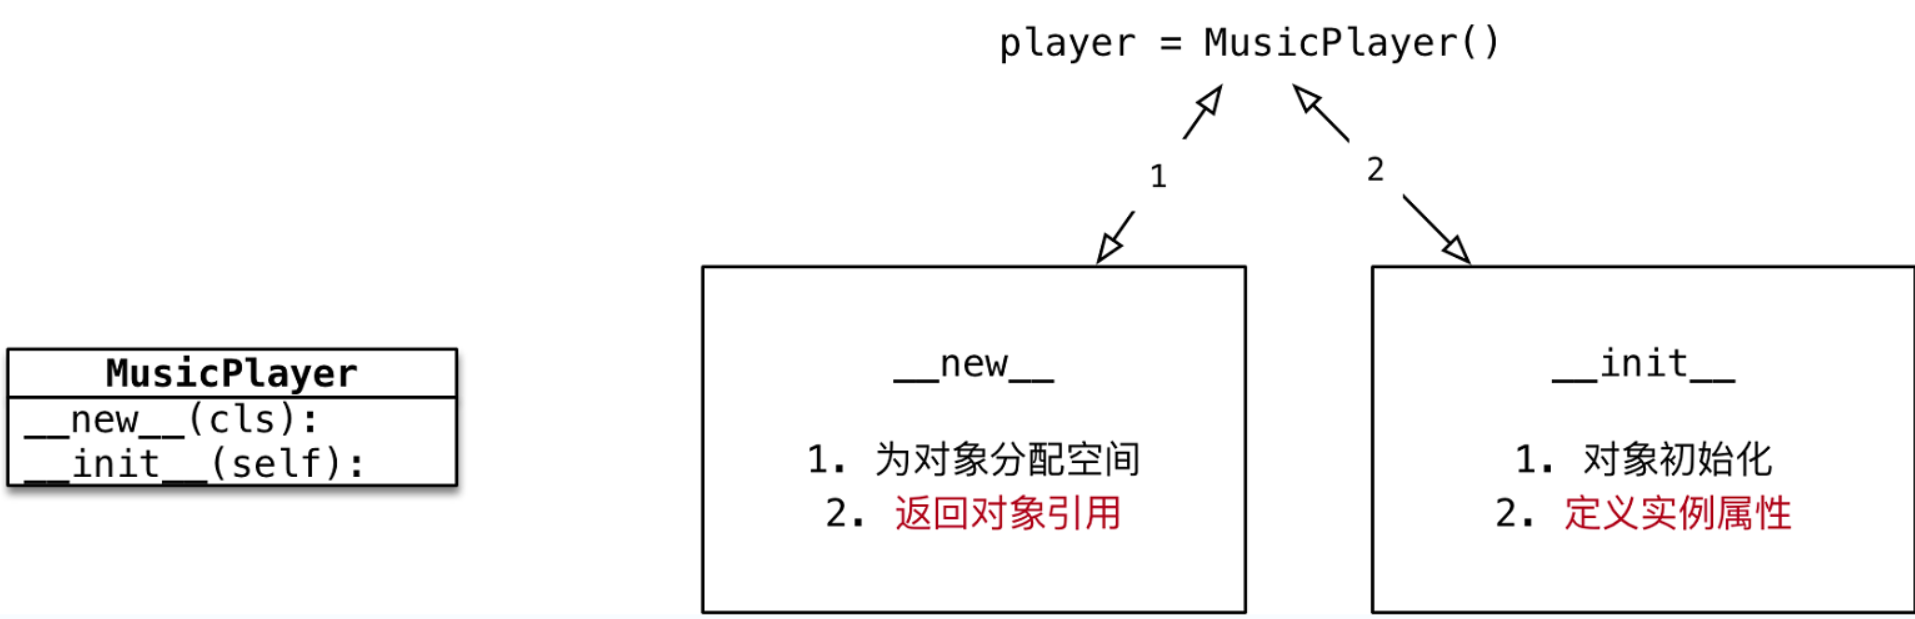


In [4]:
#重写new
class MusicPlayer(object):

    def __new__(cls, *args, **kwargs):   #一个*多值元组参数，两个*多值字典参数
        #创建对象时，new会被自动调用，但没有返回
        print("创建对象")
        
        # 为对象分配空间
        instance = super().__new__(cls)
        
        # 返回对象引用
        return instance
        
    def __init__(self):
        print("初始化音乐播放对象")

player = MusicPlayer()

print(player)


创建对象
初始化音乐播放对象


## 03. Python 中的单例

* **单例** —— 让 **类** 创建的对象，在系统中 **只有** **唯一的一个实例**
    1. 定义一个 **类属性**，初始值是 `None`，用于记录 **单例对象的引用**
    2. 重写 `__new__` 方法
    3. 如果 **类属性** `is None`，调用父类方法分配空间，并在类属性中记录结果
    4. 返回 **类属性** 中记录的 **对象引用**
    
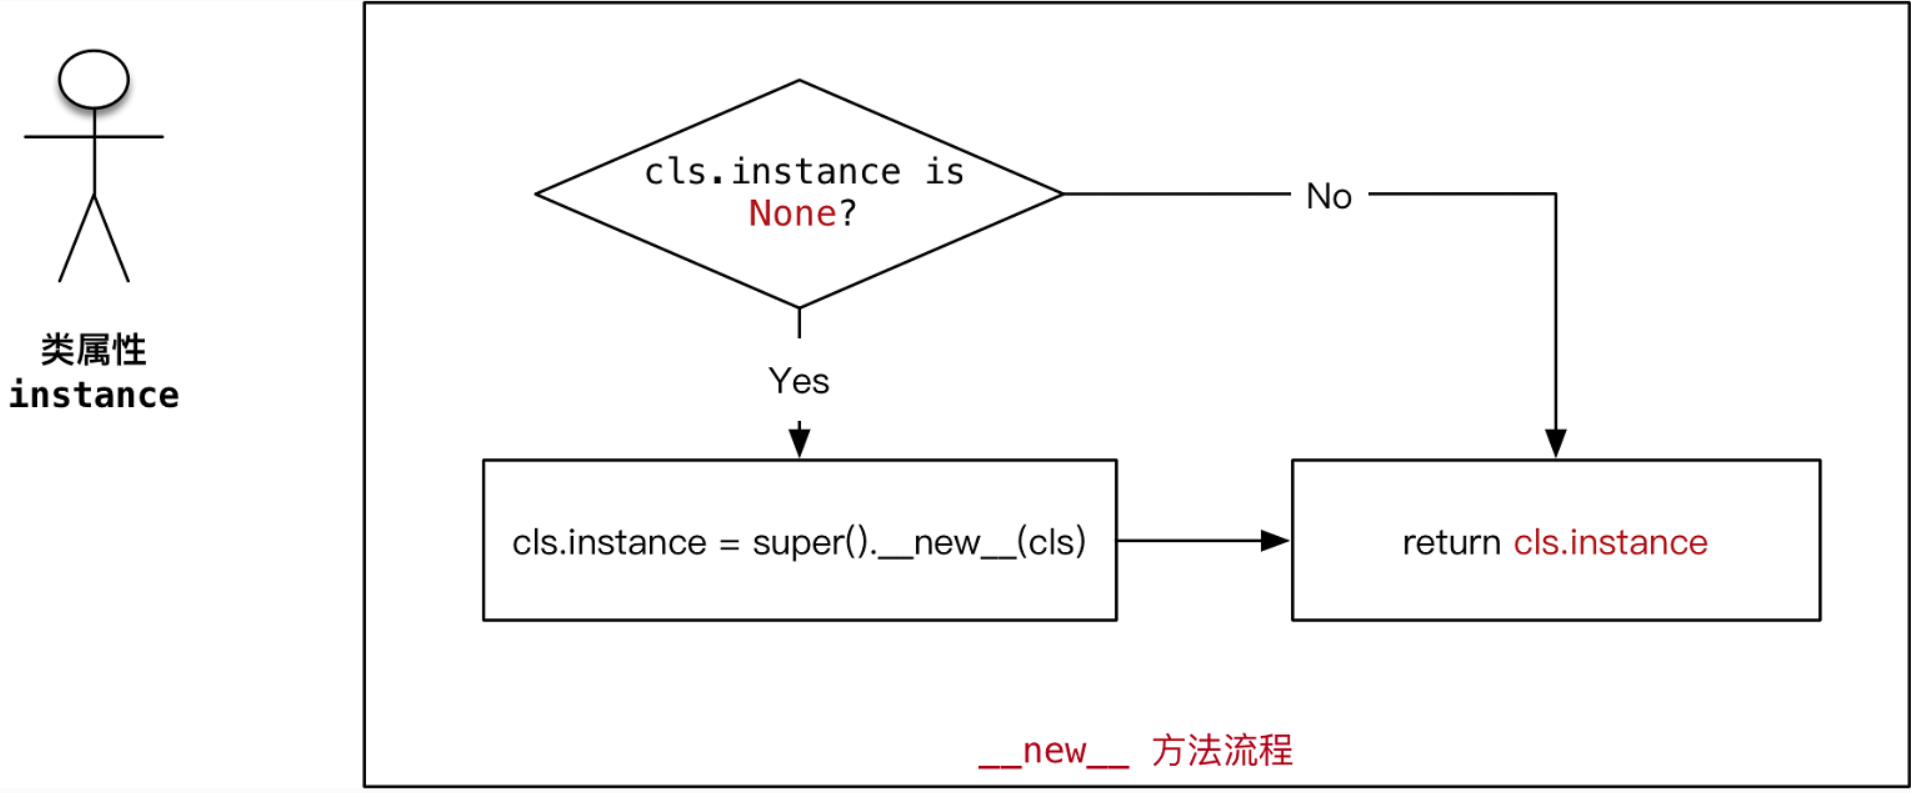

```python
class MusicPlayer(object):

    # 定义类属性记录单例对象引用
    instance = None

    def __new__(cls, *args, **kwargs):

        # 1. 判断类属性是否已经被赋值
        if cls.instance is None:
            cls.instance = super().__new__(cls)

        # 2. 返回类属性的单例引用
        return cls.instance

```

In [5]:
class MusicPlayer(object):
    pass

player1 = MusicPlayer()
print(player1)

player2 = MusicPlayer()
print(player2)
#内存地址不同

In [6]:
#单例是为了怎样调用内存地址都相同
class MusicPlayer(object):
    #记录第一个被创建的对象引用
    instance = None
    
    def __new__(cls,*arg,**kwargs):
        
        #1.判断类属性是否是空对象
        if cls.instance is None:
            # 2.调用父类方法，为第一个对象分配空间
            cls.instance = super().__new__(cls)
            
        # 3.返回类属性保存的对象引用
        return cls.instance

#现在内存地址相同
player1 = MusicPlayer()
print(player1)

player2 = MusicPlayer()
print(player2)

### 只执行一次初始化工作

* 在每次使用 `类名()` 创建对象时，`Python` 的解释器都会自动调用两个方法：
    * `__new__` 分配空间
    * `__init__` 对象初始化
* 在上一小节对 `__new__` 方法改造之后，每次都会得到 **第一次被创建对象的引用**
* 但是：**初始化方法还会被再次调用**

**需求**

* 让 **初始化动作** 只被 **执行一次**

**解决办法**

1. 定义一个类属性 `init_flag` 标记是否 **执行过初始化动作**，初始值为 `False`
2. 在 `__init__` 方法中，判断 `init_flag`，如果为 `False` 就执行初始化动作
3. 然后将 `init_flag` 设置为 `True`
4. 这样，再次 **自动** 调用 `__init__` 方法时，**初始化动作就不会被再次执行** 了

In [7]:
#单例是为了怎样调用内存地址都相同
class MusicPlayer(object):
    #记录第一个被创建的对象引用
    instance = None
    
    #记录是否执行过初始化动作
    init_flag = False
    
    def __new__(cls,*arg,**kwargs):
        
        #1.判断类属性是否是空对象
        if cls.instance is None:
            # 2.调用父类方法，为第一个对象分配空间
            cls.instance = super().__new__(cls)
            
        # 3.返回类属性保存的对象引用
        return cls.instance
    
    def __init__(self):
        # 1.判断是否执行过初始化动作
        if MusicPlayer.init_flag:
            return
        
        # 2.如果没执行过，在执行初始化动作
        print("初始化播放器")
        
        # 3.修改类属性的标记
        MusicPlayer.init_flag = True
        
#现在内存地址相同
player1 = MusicPlayer()
print(player1)

player2 = MusicPlayer()
print(player2)

初始化播放器
